In [450]:
from __future__ import print_function
import os, subprocess
from time import time
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score


## Part 1

First, we create an object containing the data in the Titanic.csv file

In [451]:
df = pd.read_csv('Titanic.csv', index_col=0, na_values=['NA'])

Let's look at the data we loaded:

In [452]:
df.head(n = 7)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1st,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.549999,E12,Southampton,3,NaN,"New York, NY"
7,1st,1,"Andrews, Miss. Kornelia Theodos",female,63.0000,1,0,13502,77.958298,D7,Southampton,10,NaN,"Hudson, NY"


The homework specified that we should only use the features "survived", "sex", "age", "pclass", and "sibsp", so we drop every other feature from the datset. We also perform some data cleaning, converting strings to integers.

In [453]:
df = df.drop(['name','parch','ticket','fare','cabin','embarked','boat','body','home.dest'], axis=1)
df = df.dropna()
df['pclass'] = df['pclass'].map( {"1st": 1, "2nd": 2, "3rd": 3} ).astype(int)
df['sex'] = df['sex'].map( {"male": 1, "female": 0} ).astype(int)

In [454]:
df.head(n=7)

,pclass,survived,sex,age,sibsp
1,1,1,0,29.0000,0
2,1,1,1,0.9167,1
3,1,0,0,2.0000,1
4,1,0,1,30.0000,1
5,1,0,0,25.0000,1
6,1,1,1,48.0000,0
7,1,1,0,63.0000,1


Now, the data is ready for making a decision tree.

In [455]:
X = df.drop(['survived'], axis=1).values
y = df['survived'].values

We randomly choose 30% of the examples as testing data, and 70% as training data:

In [456]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.3)

## Part 2

Next, we fit the decision tree model with no limitations on tree size:

In [457]:
clf_dt = tree.DecisionTreeClassifier(max_depth=None)
clf_dt.fit (X_train, y_train)

print(round(clf_dt.score (X_test, y_test)*100,2), "% accuracy on test data")

print(round(clf_dt.score (X_train, y_train)*100,2), "% accuracy on training data")

73.25 % accuracy on test data
91.26 % accuracy on training data


In [458]:
import collections
train_predictions = clf_dt.predict(X_train)
test_predictions = clf_dt.predict(X_test)

In [459]:
import graphviz 
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                         feature_names=['pclass', 'sex', 'age', 'sibsp'],  
                         class_names=["0", "1"],  
                         filled=True, rounded=True) 
graph = graphviz.Source(dot_data, format='jpg') 
graph.render("ChrSt")

'ChrSt.jpg'

![title](ChrSt.jpg)

In [460]:
corr_live_train = 0
corr_dead_train =0
for i in range(len(train_predictions)):
    if train_predictions[i] == 1:
        if y_train[i] == train_predictions[i]:
            corr_live_train +=1
    if train_predictions[i] == 0:
        if y_train[i] == train_predictions[i]:
            corr_dead_train +=1
            
corr_live_test = 0
corr_dead_test =0
for i in range(len(test_predictions)):
    if test_predictions[i] == 1:
        if y_test[i] == test_predictions[i]:
            corr_live_test +=1
    if test_predictions[i] == 0:
        if y_test[i] == test_predictions[i]:
            corr_dead_test +=1
print("Corr guess live (train): ", corr_live_train, "\tTotal actual live: ", collections.Counter(y_train)[1])
print("Corr guess dead (train): ", corr_dead_train, "\tTotal actual dead: ", collections.Counter(y_train)[0])
print("\nCorr guess live (test): ", corr_live_test, "\tTotal actual live: ", collections.Counter(y_test)[1])
print("Corr guess dead (test): ", corr_dead_test, "\tTotal actual live: ", collections.Counter(y_test)[0])

print("\nCorrectly guessed survivor on training set(%): ", round(100 * corr_live_train / collections.Counter(y_train)[1],2))
print("Correctly guessed fatality on training set(%): ", round(100 * corr_dead_train / collections.Counter(y_train)[0],2))

print("\nCorrectly guessed survivor on test set(%): ", round(100 * corr_live_test / collections.Counter(y_test)[1],2))
print("Correctly guessed fatality on test set(%): ", round(100 * corr_dead_test / collections.Counter(y_test)[0],2))

Corr guess live (train):  242 	Total actual live:  297
Corr guess dead (train):  426 	Total actual dead:  435

Corr guess live (test):  78 	Total actual live:  130
Corr guess dead (test):  152 	Total actual live:  184

Correctly guessed survivor on training set(%):  81.48
Correctly guessed fatality on training set(%):  97.93

Correctly guessed survivor on test set(%):  60.0
Correctly guessed fatality on test set(%):  82.61


# Step 4:
Next, we use cross-validation to determine best parameter to prune the tree

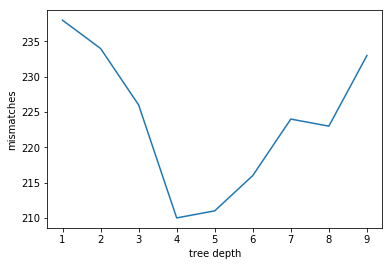

In [461]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf_dt, X, y, cv=10)
metrics.accuracy_score(y, predicted)

size = []
accuracy = []
for i in range(1,10):
    clf_dt = tree.DecisionTreeClassifier(max_depth=i)
    clf_dt.fit (X_train, y_train)
    size.append(i)
    shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
    accuracies = cross_validation.cross_val_score(clf_dt, X, y, cv=shuffle_validator)
    accuracy.append(round(((1-accuracies.mean()) * 1046)))
fig,ax = plt.subplots(1)
ax.set_xlabel('tree depth')
ax.set_ylabel('mismatches')
# plot the data
ax.plot(size,accuracy)

It looks like a tree depth of 4 has the least mismatches.

# Step 5:
Based on the results from cross validation, we prune the tree using max depth = 4

In [462]:
clf_dt = tree.DecisionTreeClassifier(max_depth=4)
clf_dt.fit (X_train, y_train)

dot_data = tree.export_graphviz(clf_dt, out_file=None,
                         feature_names=['pclass', 'sex', 'age', 'sibsp'],  
                         class_names=["0", "1"],  
                         filled=True, rounded=True) 
graph = graphviz.Source(dot_data, format='jpg') 
graph.render("ChrSt2")

'ChrSt2.jpg'

![title](ChrSt2.jpg)

In [463]:
print(round(clf_dt.score (X_test, y_test)* 100,2), "% accuracy on test data")

print(round(clf_dt.score (X_train, y_train)*100,2), "% accuracy on training data")

78.66 % accuracy on test data
82.24 % accuracy on training data


# Step 6

In [464]:
train_predictions = clf_dt.predict(X_train)
test_predictions = clf_dt.predict(X_test)
corr_live_train = 0
corr_dead_train =0
for i in range(len(train_predictions)):
    if train_predictions[i] == 1:
        if y_train[i] == train_predictions[i]:
            corr_live_train +=1
    if train_predictions[i] == 0:
        if y_train[i] == train_predictions[i]:
            corr_dead_train +=1
            
corr_live_test = 0
corr_dead_test =0
for i in range(len(test_predictions)):
    if test_predictions[i] == 1:
        if y_test[i] == test_predictions[i]:
            corr_live_test +=1
    if test_predictions[i] == 0:
        if y_test[i] == test_predictions[i]:
            corr_dead_test +=1
print("Corr guess live (train): ", corr_live_train, "\tTotal actual live (train): ", collections.Counter(y_train)[1])
print("Corr guess dead (train): ", corr_dead_train, "\tTotal actual dead (train): ", collections.Counter(y_train)[0])
print("\nCorr guess live (test): ", corr_live_test, "\tTotal actual live (test): ", collections.Counter(y_test)[1])
print("Corr guess dead (test): ", corr_dead_test, "\tTotal actual live (test): ", collections.Counter(y_test)[0])

print("\nCorrectly guessed survivor on training set(%): ", round(100 * corr_live_train / collections.Counter(y_train)[1],2))
print("Correctly guessed fatality on training set(%): ", round(100 * corr_dead_train / collections.Counter(y_train)[0],2))

print("\nCorrectly guessed survivor on test set(%): ", round(100 * corr_live_test / collections.Counter(y_test)[1],2))
print("Correctly guessed fatality on test set(%): ", round(100 * corr_dead_test / collections.Counter(y_test)[0],2))

Corr guess live (train):  187 	Total actual live (train):  297
Corr guess dead (train):  415 	Total actual dead (train):  435

Corr guess live (test):  77 	Total actual live (test):  130
Corr guess dead (test):  170 	Total actual live (test):  184

Correctly guessed survivor on training set(%):  62.96
Correctly guessed fatality on training set(%):  95.4

Correctly guessed survivor on test set(%):  59.23
Correctly guessed fatality on test set(%):  92.39


### Observations:

It looks like the pruned tree has worse accuracy (82.24% vs 91.26%) for the training data, but increased  accuracy for the test data (78.66% vs 73.25%). This is in line with our expectations, as the full tree likely overfitted to the training data. The smaller decision tree is not overfitted, and generalizes better to unseen data.

We also see that the model is better at predicting whether someone will die than if they will survive. The labels "sex=male" and "pclass=3" are strong indicators, and they mostly lead to fatalities. The remaining labels are not as strong, and it is therefore harder to correctly predict survival than fatality.